---
format: 
  html:
    embed-resources: true
execute:
  echo: true
code-fold: true
title: Avacado Prices Analysis 
author: James Compagno
jupyter: python3
---

Files and work can be found here: https://github.com/PharaohPooh/GSB_544/tree/main/Week_2/Lab_2_Avocado_Prices 

# Setup
## 0. Import the data and declare your package dependencies.

In [47]:
import numpy as np
import pandas as pd
import plotnine as p9

df_avocado = pd.read_csv("avocado_updated_2020.csv")
df_region = pd.read_csv("region_list.csv")

In [48]:
df_avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


## 1. Briefly describe the data set. What information does it contain?

The data is a week by week of Avocado sales for the Hass variety across different bag sizes and Product Lookup codes (PLU’s) across multiple regions. Regions are of variying size and some regions conrain data from other datapoints Ie the Los Angeles' region's data is also counted in California, West, and Total US. 

## 2. Clean the data in any way you see fit.

In [49]:
#Update the regions list by joining df_region on df_avocado
df_avocado_region = df_avocado.merge(df_region, on=["geography"])
#drop the unecessary georgraphy column 
df_avocado_region_clean = df_avocado_region.drop(columns=['geography'])
df_avocado_region_clean.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,New York,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,New York,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Georgia,Southeast
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Georgia,Southeast
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore / Washington,Maryland / D.C.,Northeast


In [50]:
#drop all the summary data points (ie "northeast" & "Total U.S."). Ie remove every row without a value in the city column 
df_avocado_region_clean2 = df_avocado_region_clean.dropna(subset=['city'])
df_avocado_region_clean2.iloc[25:36]


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region
27,2015-01-04,1.70,7446.43,361.76,5025.58,0.00,2059.09,746.43,1312.66,0.00,organic,2015,Detroit,Michigan,Great Lakes
28,2015-01-04,0.95,258979.63,1097.00,189348.60,22612.46,45921.57,43899.46,1097.68,924.43,conventional,2015,Grand Rapids,Michigan,Great Lakes
29,2015-01-04,1.60,1012.61,23.59,772.85,0.00,216.17,210.00,6.17,0.00,organic,2015,Grand Rapids,Michigan,Great Lakes
32,2015-01-04,1.05,203939.14,32679.84,121020.54,1286.19,48952.57,47583.64,1368.93,0.00,conventional,2015,Harrisburg / Scranton,Pennsylvania,Northeast
33,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,Harrisburg / Scranton,Pennsylvania,Northeast
34,2015-01-04,1.06,332208.14,6387.60,267593.62,165.35,58061.57,55401.31,2660.26,0.00,conventional,2015,Hartford / Springfield,Connecticut / Massachusetts,Northeast
35,2015-01-04,2.32,4801.10,87.56,4364.01,0.00,349.53,349.53,0.00,0.00,organic,2015,Hartford / Springfield,Connecticut / Massachusetts,Northeast
36,2015-01-04,0.71,1062990.62,506426.58,436347.57,4378.92,115837.55,90299.85,25537.70,0.00,conventional,2015,Houston,Texas,South Central
37,2015-01-04,1.22,8938.32,7009.77,671.88,0.00,1256.67,1256.67,0.00,0.00,organic,2015,Houston,Texas,South Central
38,2015-01-04,1.02,160130.15,4007.41,118435.79,1201.50,36485.45,20325.41,16160.04,0.00,conventional,2015,Indianapolis,Indiana,Great Lakes


In [51]:
#split date into day, month, year 
df_avocado_region_clean3 = df_avocado_region_clean2.copy()

df_avocado_region_clean3['date'] = pd.to_datetime(df_avocado_region_clean3['date'])

df_avocado_region_clean3['year'] = df_avocado_region_clean3['date'].dt.year
df_avocado_region_clean3['month'] = df_avocado_region_clean3['date'].dt.month
df_avocado_region_clean3['day'] = df_avocado_region_clean3['date'].dt.day

In [ ]:
# Rename PLU columns
df_avocado_region_clean3 = df_avocado_region_clean3.rename(columns={
    "4046": "small",
    "4225": "large",
    "4770": "extra_large",
    "geography": "location"
})

# Melt the data
df_avocado_long = df_avocado_region_clean3.melt(
    id_vars=["date", "average_price", "type", "city", "total_volume",
             "total_bags", "small_bags", "large_bags", "xlarge_bags"],
    value_vars=["small", "large", "extra_large"],
    var_name="hass_avocado_size",
    value_name="quantity_sold"
)

df_avocado_long.head()

,date,average_price,type,city,total_volume,total_bags,small_bags,large_bags,xlarge_bags,hass_avocado_size,quantity_sold
0,2015-01-04,1.22,conventional,Albany,40873.28,9716.46,9186.93,529.53,0.0,small,2819.50
1,2015-01-04,1.79,organic,Albany,1373.95,1162.65,1162.65,0.00,0.0,small,57.42
2,2015-01-04,1.00,conventional,Atlanta,435021.49,46815.79,16707.15,30108.64,0.0,small,364302.39
3,2015-01-04,1.76,organic,Atlanta,3846.69,1408.19,1071.35,336.84,0.0,small,1500.15
4,2015-01-04,1.08,conventional,Baltimore / Washington,788025.06,141136.68,137146.07,3990.61,0.0,small,53987.31


In [54]:
#make a better dataframe name but leave room for more transformation later if necessary
df_arc = df_avocado_long

# Exercises

## 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

Answer:The Northeast region buys the most small bags of avocados 

Assumption: "Major geographical region" means the broader regions such as "Great Lakes" that I have converted into the region column in the dataset not just the four US Census-style regions

In [66]:
# Filter to organic in 2017 using your cleaned, unmelted table
organic_2017 = df_avocado_region_clean3.query("type == 'organic' and year == 2017")

# Sum small_bags by region
region_sales = (
    organic_2017
      .groupby('region', as_index=False)['small_bags']
      .sum()
      .rename(columns={'small_bags': 'small_bags_total'})
)

# Rank regions by total small_bags
top_region = region_sales.sort_values('small_bags_total', ascending=False)

print(top_region)

          region  small_bags_total
2      Northeast        6967779.31
6           West        4933592.76
4  South Central        2251455.86
5      Southeast        1760517.35
0    Great Lakes        1300624.18
1       Midsouth         119008.08
3         Plains          96767.82


## 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

Answer: Month 5 (May) has the highest sales by month of 326377.749070

In [67]:
sales_by_month = (
    df_avocado_region_clean3
      .groupby('month', as_index=False)['total_volume']
      .mean()  
      .sort_values('total_volume', ascending=False)
      .head(5)
)

print(sales_by_month)

   month   total_volume
4      5  326377.749070
1      2  318709.105010
5      6  303992.202729
3      4  294309.834263
2      3  288237.355979


## 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [68]:
# Top 5 cities by mean total volume
sales_by_metro = (
    df_avocado_region_clean3
      .groupby('city', as_index=False)['total_volume']
      .mean()
      .sort_values('total_volume', ascending=False)
      .head(5)
)

print(sales_by_metro)

                   city  total_volume
20          Los Angeles  1.567566e+06
25        New York City  8.631458e+05
10  Dallas / Fort Worth  7.127519e+05
16              Houston  6.876533e+05
28     Phoenix / Tucson  6.250383e+05


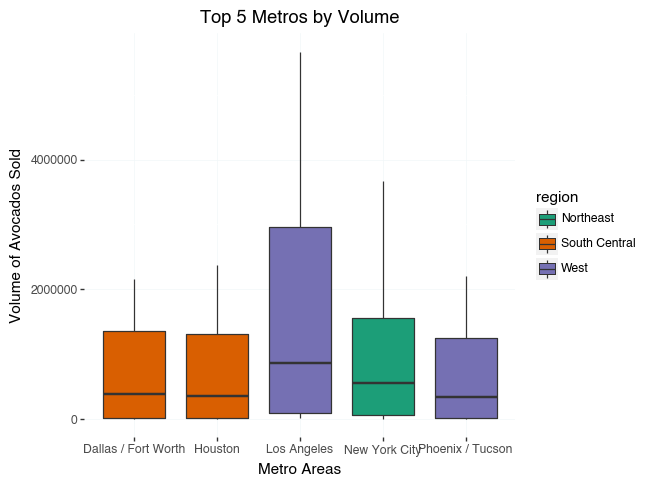

In [ ]:
(p9.ggplot(
        df_avocado_region_clean3.query("city in ['Los Angeles', 'New York City', 'Dallas / Fort Worth', 'Houston', 'Phoenix / Tucson']"),
        p9.aes(
            x="city",
            y="total_volume",
            fill="region"))
    + p9.geom_boxplot()
    + p9.labs(
        title="Top 5 Metros by Volume",
        x="Metro Areas",
        y="Volume of Avocados Sold"
    )
    + p9.scale_fill_manual(
        values={
            "West": "#7570b3",
            "Northeast": "#1c9e78",
            "South Central": "#d95f01"
        }
    )
    + p9.theme(
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5)
    )
)


#Pivoting

## 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only. "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

In [69]:
# Filter for California cities
df_avocado_ca = df_avocado_region_clean3.query(
    "city in ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']")

df_avocado_ca.head()

,date,average_price,total_volume,small,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,California,West,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,California,West,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,California,West,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,California,West,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,California,West,1,4


## 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

San Francisco shows the biggest average price difference however it has the highest average price for both conventional and organic already

In [70]:
# Average avocado price by city and type (California only)
avg_price_by_city_type = (
    df_avocado_ca
      .groupby(['city', 'type'], as_index=False)['average_price']
      .mean()
)

print(avg_price_by_city_type)

            city          type  average_price
0    Los Angeles  conventional       1.047124
1    Los Angeles       organic       1.574902
2     Sacramento  conventional       1.295359
3     Sacramento       organic       1.873856
4      San Diego  conventional       1.113856
5      San Diego       organic       1.798366
6  San Francisco  conventional       1.400490
7  San Francisco       organic       2.119444


In [71]:
#Difference between 
price_diff = (
    df_avocado_ca
      .pivot_table(
          values='average_price',
          index='city',
          columns='type',
          aggfunc='mean'
      )
      .reset_index()
)

#  organic vs conventional 
price_diff['price_difference'] = price_diff['organic'] - price_diff['conventional']

print(price_diff)


type           city  conventional   organic  price_difference
0       Los Angeles      1.047124  1.574902          0.527778
1        Sacramento      1.295359  1.873856          0.578497
2         San Diego      1.113856  1.798366          0.684510
3     San Francisco      1.400490  2.119444          0.718954


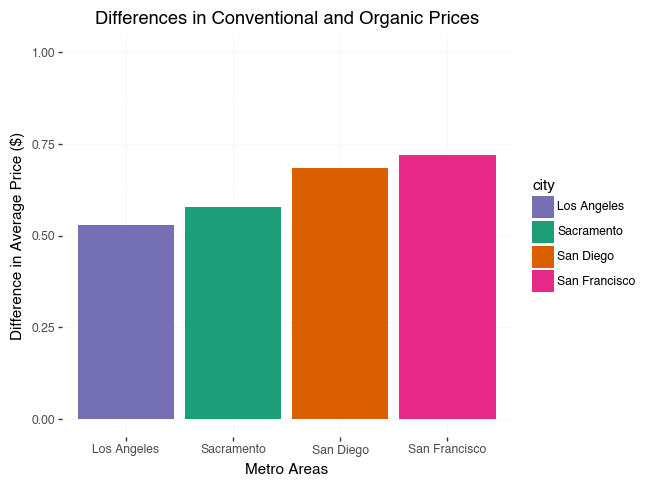

In [72]:
(p9.ggplot(
        price_diff,
        p9.aes(
            x="city",
            y="price_difference",
            fill="city"
        )
    )
    + p9.geom_col()
    + p9.labs(
        title="Differences in Conventional and Organic Prices",
        x="Metro Areas",
        y="Difference in Average Price ($)"
    )
    + p9.scale_fill_manual(
        values={
            "Los Angeles": "#7570b3",
            "Sacramento": "#1c9e78",
            "San Diego": "#d95f01",
            "San Francisco": "#e7298a"
        }
    )
    + p9.scale_y_continuous(limits=(0, 1))
    + p9.theme(
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5)
    )
)


## 8. Recreated plot for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. 

In [73]:
total_volume_by_group = (
    df_avocado_long.query("city in ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']")
      .groupby(['city', 'type'], as_index=False)['quantity_sold']
      .sum()
      .rename(columns={'quantity_sold': 'total_volume_group'})
)

In [74]:
# Merge the total volume back into the main DataFrame
df_proportions = pd.merge(
    df_avocado_long,
    total_volume_by_group,
    on=['city', 'type'],
    how='left'
)

# Calculate the proportion of each avocado size within city & type
df_proportions['proportion'] = (
    df_proportions['quantity_sold'] / df_proportions['total_volume_group']
)

df_proportions.head()

,date,average_price,type,city,total_volume,total_bags,small_bags,large_bags,xlarge_bags,hass_avocado_size,quantity_sold,total_volume_group,proportion
0,2015-01-04,1.22,conventional,Albany,40873.28,9716.46,9186.93,529.53,0.0,small,2819.50,NaN,NaN
1,2015-01-04,1.79,organic,Albany,1373.95,1162.65,1162.65,0.00,0.0,small,57.42,NaN,NaN
2,2015-01-04,1.00,conventional,Atlanta,435021.49,46815.79,16707.15,30108.64,0.0,small,364302.39,NaN,NaN
3,2015-01-04,1.76,organic,Atlanta,3846.69,1408.19,1071.35,336.84,0.0,small,1500.15,NaN,NaN
4,2015-01-04,1.08,conventional,Baltimore / Washington,788025.06,141136.68,137146.07,3990.61,0.0,small,53987.31,NaN,NaN


In [87]:
keep_cities = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
dfp = (
    df_proportions
    .loc[df_proportions['city'].isin(keep_cities)]
    .copy()
)
dfp['city'] = pd.Categorical(dfp['city'], categories=keep_cities, ordered=True)
dfp['hass_avocado_size'] = pd.Categorical(
    dfp['hass_avocado_size'], categories=['extra_large','large','small'], ordered=True
)

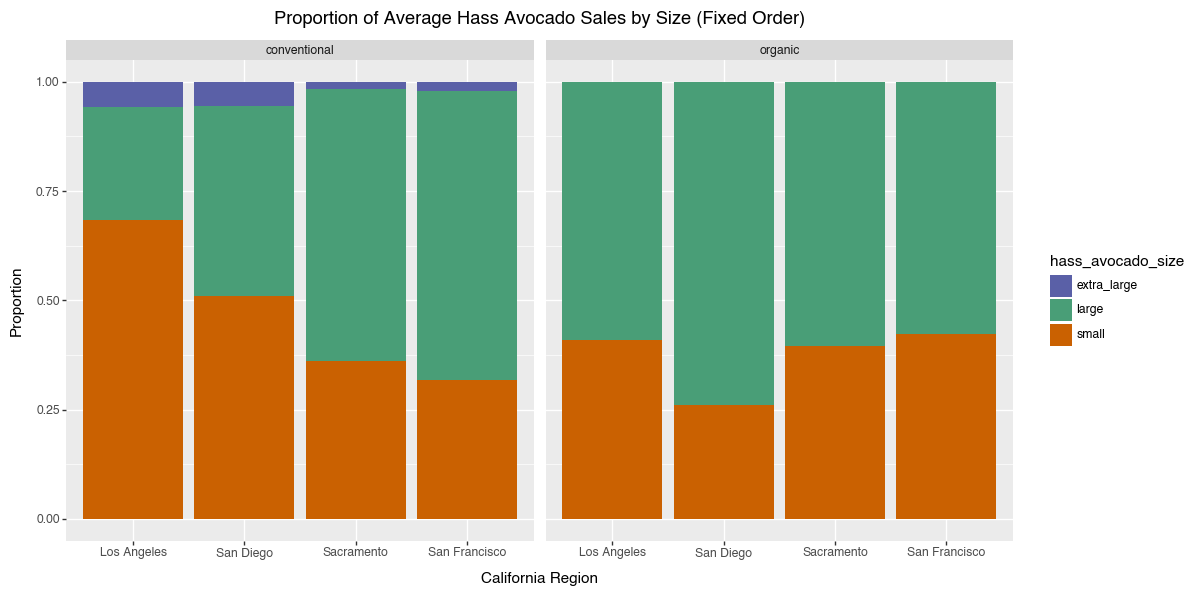

In [ ]:
(p9.ggplot(dfp, p9.aes(x='city', y='proportion', fill='hass_avocado_size'))
    + p9.geom_col(position='stack')
    + p9.facet_wrap('~ type')
    + p9.scale_fill_manual(values={
        'extra_large': '#5a60a7',
        'large':      '#499e77',
        'small':      '#ca6101'
      })
    + p9.labs(title='Proportion of Average Hass Avocado Sales by Size (Fixed Order)',
              x='California Region', y='Proportion')
    + p9.theme(figure_size=(12, 6))
)

#Using Outside Data

Data taken from: https://www.redfin.com/news/data-center/

In [80]:
#Import the data and Pivot wide to long 
df_home_prices = pd.read_csv("med_sale_price.csv")
df_home_prices.head()


,city,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,...,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020
0,Los Angeles,470000,480000,494500,494000,506500,505000,510000,499000,498572,...,660000,650000,635000,655000,700000,710000,730000,735000,718000,730000
1,Sacramento,310000,305000,315000,325000,325000,319000,317500,315000,316607,...,430000,430000,429000,445000,465000,468000,470950,479000,474000,475000
2,San Diego,442000,460000,460000,469000,480000,480000,470000,464250,462500,...,599000,610000,598053,609000,641750,653500,662000,660000,660000,660000
3,San Francisco,1050000,1100000,1115000,1195000,1139000,1145000,1112500,1087500,1148000,...,1450000,1400000,1500000,1549000,1450000,1512500,1450000,1417500,1400000,1350000


In [81]:
long_home_prices = df_home_prices.melt(id_vars=['city'], var_name='month_year', value_name='median_sale_price')
long_home_prices.head()

,city,month_year,median_sale_price
0,Los Angeles,February 2015,470000
1,Sacramento,February 2015,310000
2,San Diego,February 2015,442000
3,San Francisco,February 2015,1050000
4,Los Angeles,March 2015,480000


In [82]:
pd.to_datetime(long_home_prices['month_year'], format='%B %Y')
long_home_prices['month_year'] = pd.to_datetime(long_home_prices['month_year'])

long_home_prices['year'] = long_home_prices['month_year'].dt.year
long_home_prices['month'] = long_home_prices['month_year'].dt.month
long_home_prices = long_home_prices.drop(columns=['month_year'])
long_home_prices.head()

<positron-console-cell-82>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


,city,median_sale_price,year,month
0,Los Angeles,470000,2015,2
1,Sacramento,310000,2015,2
2,San Diego,442000,2015,2
3,San Francisco,1050000,2015,2
4,Los Angeles,480000,2015,3


In [90]:
df_arc_ca = df_avocado_region_clean3

In [91]:
print(df_arc_ca[['city', 'year', 'month']].dtypes)
print(long_home_prices[['city', 'year', 'month']].dtypes)

city     object
year      int32
month     int32
dtype: object
city     object
year      int32
month     int32
dtype: object


In [92]:
df_arc_ca.head()

,date,average_price,total_volume,small,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,New York,Northeast,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,New York,Northeast,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,Georgia,Southeast,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,Georgia,Southeast,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore / Washington,Maryland / D.C.,Northeast,1,4


In [93]:
#Update the data by joining housing data on avocado data
df_ca_avo_home = df_arc_ca.merge(long_home_prices, on=["city","year","month"])
df_ca_avo_home.head()

,date,average_price,total_volume,small,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region,month,day,median_sale_price
0,2015-02-01,0.74,4031949.04,2770656.27,854673.24,64439.70,342179.83,308754.64,31108.07,2317.12,conventional,2015,Los Angeles,California,West,2,1,470000
1,2015-02-01,1.12,50107.32,39628.65,1721.95,0.00,8756.72,8756.72,0.00,0.00,organic,2015,Los Angeles,California,West,2,1,470000
2,2015-02-01,1.04,771974.90,287292.15,429601.75,15342.47,39738.53,39738.53,0.00,0.00,conventional,2015,Sacramento,California,West,2,1,310000
3,2015-02-01,1.22,13195.65,7103.90,5624.41,0.00,467.34,467.34,0.00,0.00,organic,2015,Sacramento,California,West,2,1,310000
4,2015-02-01,0.85,692276.13,357235.87,277723.14,15691.23,41625.89,36622.51,4738.29,265.09,conventional,2015,San Diego,California,West,2,1,442000


In [94]:
#Create a variable that calculates how many avacados a home costs 
df_ca_avo_home['avocados_to_home'] = df_ca_avo_home['median_sale_price'] / df_ca_avo_home['average_price']
df_ca_avo_home.head()

,date,average_price,total_volume,small,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region,month,day,median_sale_price,avocados_to_home
0,2015-02-01,0.74,4031949.04,2770656.27,854673.24,64439.70,342179.83,308754.64,31108.07,2317.12,conventional,2015,Los Angeles,California,West,2,1,470000,635135.135135
1,2015-02-01,1.12,50107.32,39628.65,1721.95,0.00,8756.72,8756.72,0.00,0.00,organic,2015,Los Angeles,California,West,2,1,470000,419642.857143
2,2015-02-01,1.04,771974.90,287292.15,429601.75,15342.47,39738.53,39738.53,0.00,0.00,conventional,2015,Sacramento,California,West,2,1,310000,298076.923077
3,2015-02-01,1.22,13195.65,7103.90,5624.41,0.00,467.34,467.34,0.00,0.00,organic,2015,Sacramento,California,West,2,1,310000,254098.360656
4,2015-02-01,0.85,692276.13,357235.87,277723.14,15691.23,41625.89,36622.51,4738.29,265.09,conventional,2015,San Diego,California,West,2,1,442000,520000.000000


The below code shares the average cost of a home in terms of the equivalent number of avacados that money can buy in the same city. 

In [95]:
avos_per_home = (
    df_ca_avo_home
    .groupby(['city'])['avocados_to_home']
    .mean()
    .reset_index()
    .round(2)
    .sort_values(by='avocados_to_home', ascending=False)
)

print(avos_per_home)

            city  avocados_to_home
3  San Francisco         787815.10
0    Los Angeles         480159.41
2      San Diego         408132.75
1     Sacramento         253309.87


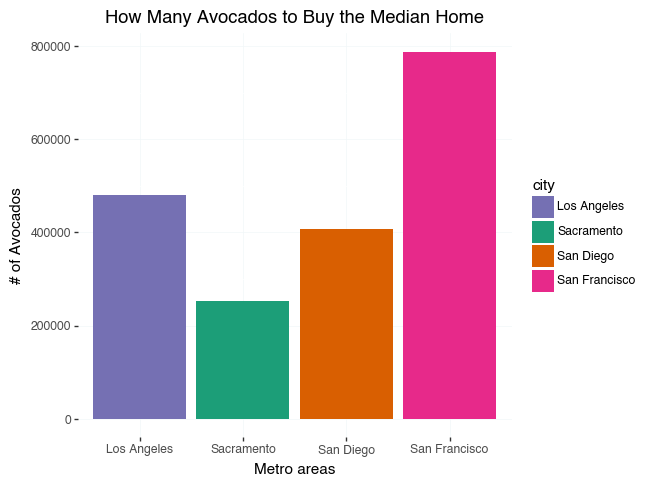

In [96]:
(p9.ggplot(avos_per_home,
p9.aes(
  x = "city",
  y = "avocados_to_home",
  fill = "city"
))
+ p9.geom_col() 
    + p9.labs(
        title="How Many Avocados to Buy the Median Home",
        x="Metro areas", y="# of Avocados") 
    + p9.scale_fill_manual(values={"Los Angeles":"#7570b3", "Sacramento":"#1c9e78",
            "San Diego":"#d95f01", "San Francisco":"#e7298a"})
    + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))
    )

Compare this to the difference in average price between conventional and organic avocados above, as well as the comparison of average organic prices below. The correlation between avocado prices and home prices isn’t perfect, as evidenced by Sacramento, which had the second-highest average avocado price but the lowest number of avocados needed to purchase a home. This suggests that while avocados may be expensive, the real challenge in buying a home in these millennial-friendly cities lies in the overall housing costs. Homes in San Francisco and San Diego are expensive regardless of the relative cost of avocados.

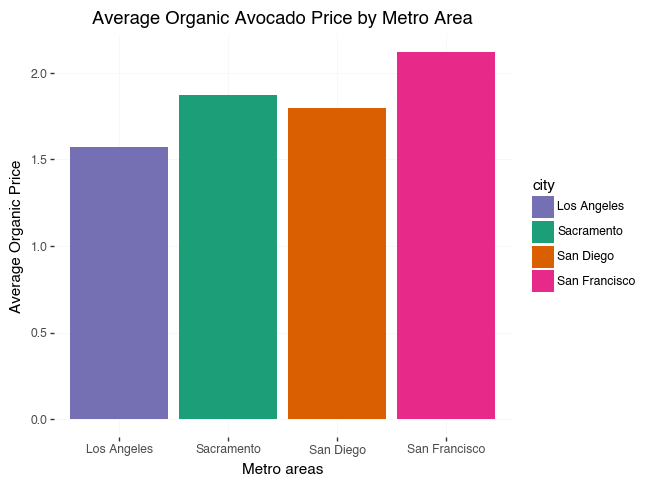

In [97]:
(p9.ggplot(price_diff,
p9.aes(
  x = "city",
  y = "organic",
  fill = "city"
))
+ p9.geom_col() 
    + p9.labs(
        title="Average Organic Avocado Price by Metro Area",
        x="Metro areas", y="Average Organic Price") 
    + p9.scale_fill_manual(values={"Los Angeles":"#7570b3", "Sacramento":"#1c9e78",
            "San Diego":"#d95f01", "San Francisco":"#e7298a"})
    + p9.theme(panel_background=p9.element_rect(fill="white"), panel_grid_major=p9.element_line(color="#f2f7f8", size=0.5))
    )